<a href="https://colab.research.google.com/github/fundamentals-of-data-science/course-materials/blob/master/labs/Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2 Lab - Probability

## Directions

**Failure to follow the directions will result in a "0"**

The due dates for each are indicated in the Syllabus and the course calendar. If anything is unclear, please email the official email for the course or ask questions in the Lab discussion area on Blackboard.

The Labs also present technical material that augments the lectures and "book".  You should read through the entire lab at the start of each module.

### General Instructions

1.  You will be submitting your assignment to Blackboard. If there are no accompanying files, you should submit *only* your notebook and it should be named using *only* your JHED id: fsmith79.ipynb for example if your JHED id were "fsmith79". If the assignment requires additional files, you should name the *folder/directory* your JHED id and put all items in that folder/directory, ZIP it up (only ZIP...no other compression), and submit it to Blackboard.
    
    * do **not** use absolute paths in your notebooks. All resources should appear in the same directory as the rest of your assignments.
    * the directory **must** be named your JHED id and **only** your JHED id.
    
2. Data Science is as much about what you write (communicating) as the code you execute (researching). In many places, you will be required to execute code and discuss both the purpose and the result. Additionally, Data Science is about reproducibility and transparency. This includes good communication with your team and possibly with yourself. Therefore, you must show **all** work.

3. Avail yourself of the Markdown/Codecell nature of the notebook. If you don't know about Markdown, look it up. Your notebooks should not look like ransom notes. Don't make everything bold. Clearly indicate what question you are answering.

4. Submit a cleanly executed notebook. It should say `In [1]` for the first codecell and increase by 1 throughout.

In [1]:
from pprint import pprint

## Manipulating and Interpreting Probability

Given the following *joint probability distribution*, $P(A,B)$, for $A$ and $B$,

```
|    | a1   | a2   |
|----|------|------|
| b1 | 0.37 | 0.16 |
| b2 | 0.23 | ?    |
```

Answer the following questions.

**1\. What is $P(A=a2, B=b2)$?**

All probability distributions sum to 1. If we take 1 and subtract out the probabilities for the events we do know about, we'll find the probability for the one event we don't know: 1 - 0.37 - 0.16 - 0.23 = ?

In [2]:
print(1 - 0.37 - 0.16 - 0.23)

0.23999999999999996


The probability of $P(a2, b2)$ is 0.24

<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Note</strong>
    <p>Get used to this pattern: discuss/code/discuss. Except in the most obvious cases (some of which are below, because they're just math), there should always be dicussion then code then a discussion of the results. Get in the habit of making three (3) cells: markdown, code, markdown every. single. time. and filling them in.</p>
</div>


**2\. If I observe events from this probability distribution, what is the probability of seeing (a1, b1) then (a2, b2)?**

The two observations are independent. The definition of independence: $P((a2,b2)|(a1,b1) = P((a2,b2))$ which means that observing the first event does not give me any additional information about the probability of the second event (it does not change how uncertain I am about (a2, b2) happening by modifying the base or *prior* probability).

This does not mean, however, that A and B are independent; we're talking about the *joint* event and the *joint* probability.

The probability of two independent events is the productive of their individual probabilities:

In [3]:
print((0.37 * 0.24))

0.08879999999999999


The probability of $P((a1, b1), (a2, b2))$ is 8.88%

<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Note</strong>
    <p>We generally look for 2 decimal places unless the smallest probability of interest has more in which case we use those many decimal places for all calucations.</p>
    <p>It is tempting to write something like this:</p>
</div>


In [4]:
print( "the probability of (a1, b1) then (a2, b2) is %.2f" % (0.37 * 0.24))

the probability of (a1, b1) then (a2, b2) is 0.09


<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <p>Don't.</p>
    <p>It's very strange to read because you read the code and the code has most of the text in it then some calculation. The code cell should only have the calculation.</p>
    <p>There are plugins that allow you to reference variables inside Markdown cells. It's better to use those, although not for this class (so far). You can, when appropriate, generate tables using code.</p>
</div>


**3\. Calculate the marginal probability distribution, $P(A)$.**

<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Note</strong>
    <p>There are any number of ways to answer this. Much of it depends on your decision about how you want to represent probability distributions. We're going to use Dicts.</p>
</div>

The probability distribution $P(A)$ is a marginal probability distribution of the joint $P(A, B)$:

In [5]:
p = {"a1": {"b1": 0.37, "b2": 0.23}, "a2": {"b1": 0.16, "b2": 0.24}}

Calculating $P(A)$ involves marginalizing B *out*. We can do this by summing the individual elements:

In [6]:
p_a = {"a1": p["a1"]["b1"] + p["a1"]["b2"], "a2": p["a2"]["b1"] + p["a2"]["b2"]}
pprint(p_a)

{'a1': 0.6, 'a2': 0.4}


**4\. Calculate the marginal probability distribution, $P(B)$.**

As with $P(A)$, $P(B)$ is involves marginalizing *A* out of $P(A B)$:

In [7]:
p_b = {"b1": p["a1"]["b1"] + p["a2"]["b1"], "b2": p["a1"]["b2"] + p["a2"]["b2"]}
pprint(p_b)

{'b1': 0.53, 'b2': 0.47}


**5\. Calculate the conditional probability distribution, $P(A|B)$.**

The calculation of a conditional probability for A creates a new probability distribution for each event in B. That is, instead of wanting to know $P(a1, b1)$ or $P(a2, b1)$, we want to know $P(a1|b1)$ and $P(a2|b1)$. Remember, conditional probability expresses the idea "if we know that b1 happened, how does this change the probabilities of a1, a2, etc.". We then do this for each possible value of B.

The formula for conditional probability is:

$$P(A|B) = \frac{P(A, B)}{P(B)}$$

In [8]:
p_a_given_b = {"b1": {"a1": (p["a1"]["b1"])/(p["a1"]["b1"] + p["a2"]["b1"]), "a2": (p["a2"]["b1"])/(p["a1"]["b1"] + p["a2"]["b1"])},
               "b2": {"a1": (p["a1"]["b2"])/(p["a1"]["b2"] + p["a2"]["b2"]), "a2": (p["a2"]["b2"])/(p["a1"]["b2"] + p["a2"]["b2"])}}
pprint(p_a_given_b)

{'b1': {'a1': 0.6981132075471698, 'a2': 0.3018867924528302},
 'b2': {'a1': 0.4893617021276596, 'a2': 0.5106382978723404}}


<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Note</strong>
    <p>At this point, printing a table would probably be appropriate.</p>
</div>


In [9]:
from tabulate import tabulate

In [10]:
def unnest(pd):
    """
    utility function to unnest a conditional probability distribution represented as Dicts
    """
    result = []
    for k, d in pd.items():
        for j, val in d.items():
            row = [k]
            row.append(j)
            row.append(val)
            result.append(row)
    return result

<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Note</strong>
    <p>Often, helper functions just need a docstring so that the main notebook's flow of explanation of the investigation isn't broken.</p>
</div>


In [11]:
tabulate(unnest(p_a_given_b), headers=["B", "A", "P(A|B)"], tablefmt="html", floatfmt=".2f")

B,A,P(A|B)
b1,a1,0.70
b1,a2,0.30
b2,a1,0.49
b2,a2,0.51


<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Note</strong>
    <p>If we were calculating a conditional probability distribution for a reason, we would discuss what we found out here. For example, the Titanic questions below.</p>
</div>


**6\. Calculate the conditional probability distribution, $P(B|A)$.**

The same reasoning applies here as when we calculated $P(A|B)$:

In [12]:
p_b_given_a = {"a1": {"b1": (p["a1"]["b1"])/(p["a1"]["b1"] + p["a1"]["b2"]), "b2": (p["a1"]["b2"])/(p["a1"]["b1"] + p["a1"]["b2"])}, 
               "a2": {"b1": (p["a2"]["b1"])/(p["a2"]["b1"] + p["a2"]["b2"]), "b2": (p["a2"]["b2"])/(p["a2"]["b1"] + p["a2"]["b2"])}}

In [13]:
tabulate(unnest(p_b_given_a), headers=["A", "B", "P(B|A)"], tablefmt="html", floatfmt=".2f")

A,B,P(B|A)
a1,b1,0.62
a1,b2,0.38
a2,b1,0.40
a2,b2,0.60


**7\. Does $P(A|B) = P(B|A)$? What do we call the belief that these are always equal?**

This question can potentially be a bit confusing because if you look at the *table* that each of these represents, they don't exactly line up. What is we are really asking is if $P(a1|b1)$ is equal to $P(b1|a1)$, etc.

By looking at the two sets of results, we can see that they are definitely not equal. P(a1|b1) = 0.62 and P(b1|a1) = 0.70, P(a1|b2) = 0.4 and P(b2|a1) = 0.3.

The belief that these are always equal is the **inverse probability fallacy**.

**8\. Does $P(A) = P(A|B)$? What does that mean about the independence of $A$ and $B$?**

No, they do not. P(a1) = 0.40 and P(a1|b1) = 0.62. This means that A and B are not independent. 

You can test your understanding by creating a joint probability P(A, B) where they are independent. Start with A and B as two flips of a fair coin and then try to come up with a more interesting example.

**9\. Using $P(A)$, $P(B|A)$, $P(B)$ from above, calculate,**

$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$

Does it match your previous calculation for $P(A|B)$?

We have everything we need from our previous calculations: $P(B|A)$, $P(A)$, and $P(B)$, we just need to do the calculation:

In [14]:
bayes = {"b1": {"a1": (p_b_given_a["a1"]["b1"]*p_a["a1"]/p_b["b1"]),
                "a2": (p_b_given_a["a2"]["b1"]*p_a["a2"]/p_b["b1"])},
         "b2": {"a1": (p_b_given_a["a1"]["b2"]*p_a["a1"]/p_b["b2"]),
                "a2": (p_b_given_a["a2"]["b2"]*p_a["a2"]/p_b["b2"])}}

Here's $P(A|B)$ we calculated using Bayes Rule:

In [15]:
tabulate(unnest(bayes), headers=["B", "A", "P(A|B)"], tablefmt="html", floatfmt=".2f")

B,A,P(A|B)
b1,a1,0.70
b1,a2,0.30
b2,a1,0.49
b2,a2,0.51


Here's $P(A|B)$ we calculated by using the joint probability $P(A,B)$:

In [16]:
tabulate(unnest(p_a_given_b), headers=["B", "A", "P(A|B)"], tablefmt="html", floatfmt=".2f")

B,A,P(A|B)
b1,a1,0.70
b1,a2,0.30
b2,a1,0.49
b2,a2,0.51


They're the same. (This isn't really magic if you look at the math you did).

**10\. If we let A = H (some condition, characteristic, hypothesis) and B = D (some data, evidence, a test result), then how do we interpret each of the following: $P(H)$, $P(D)$, $P(H|D)$, $P(D|H)$, $P(H, D)$?**

$P(H)$ - prior distribution (prior probability of the hypothesis). This is how likely we think each hypothesis is before we see the *new* evidence. The prior may be the posterior distribution from previous experiments.

$P(D)$ - probability of the data. There's not really much to say here. It's the normalizer that turns all our calculations of the numerator back into proper probabilities.

$P(H|D)$ - posterior distribution (posterior probability of the hypothesis). This is how likely we think each hypothesis is after we have taken the *new* evidence into account. It may form the prior of future experiments.

$P(D|H)$ - likelihood (probability of the data given the hypothesis). Basically this is the probability of the data under each possible hypothesis but we look at it the other way (from data to hypothesis).

$P(H, D)$ - the joint probability of the data and hypotheses. Not much to say here because it doesn't actually figure into Bayes Rule.

## Bayes Rule

Bayes Rule will be an important part of our toolset in the weeks to come, especially in terms of Bayesian Inference. Work through the following problems in Bayes Rule.

### Problem 1 (Regular)

You might be interested in finding out a patient’s probability of having liver disease if they are an alcoholic. “Being an alcoholic” is the test (kind of like a litmus test) for liver disease.

Let `D` be the presence or absence of liver disease (`d` they have it; `~d`, "not d", they don't). Past data tells you that 10% of patients entering your clinic have liver disease. Let `A` be alcoholic (`a`) or not alcoholic (`~a`). 5% of the clinic’s patients are alcoholics.

You know that among those patients diagnosed with liver disease, 7% are alcoholics and that 95.2% of non-alcoholics do not have liver disease.

<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Note</strong>
    <p>For multi-part questions, make sure you have answered every part and clearly indicate what part you're answering.</p>
    <p>If they aren't provided, you can even add cells in between the questions.</p>
</div>

1. What is Bayes Rule for this problem? (write it out symbolically)

$P(D|A) = \frac{P(A|D)P(D)}{P(A)}$

2. From the above word problem, what values of Bayes Rule do you have? Which ones are missing?

P(d) = 0.10

P(a) = 0.05

P(a|d) = 0.07

P(\~a|\~d) = 0.952

We're missing P(\~d), P(\~a), P(\~a|d), P(a|\~d).

3. Calculate the missing values.

P(\~d) = 1 - P(d) = 1 - 0.10 = 0.90

P(\~a) = 1 - P(a) = 1 - 0.0.5 = 0.95

P(\~a|d) = 1 - P(a|d) = 1 - 0.07 = 0.93

P(a|\~d) = 1 - P(\~a|\~d) = 1 - 0.952 = 0.048

4. Calculate the posterior probability *distributions* using Bayes Rule.

We can use the code from *Fundamentals* if we get everything in the right shape.

In [17]:
def normalize( dist):
    normalizer = sum( dist.values())
    for k in dist.keys():
        dist[ k] = dist[ k] / normalizer
    return dist # don't need to do this.

def query( prior, likelihoods, evidence):
    posterior = {}
    for k in prior.keys():
        posterior[ k] = likelihoods[ k][ evidence] * prior[ k]
    normalize( posterior)
    return posterior

In [18]:
p_d = {"~d": 0.90, "d": 0.10}
p_a_given_d = {"~d": {"a": 0.048, "~a": 0.952},
               "d": {"a": 0.07, "~a": 0.93}}

In [19]:
tabulate(unnest(p_a_given_d), headers=["D", "A", "P(A|D)"], tablefmt="html", floatfmt=".2f")

D,A,P(A|D)
~d,a,0.05
~d,~a,0.95
d,a,0.07
d,~a,0.93


In [20]:
bayes_d_a = {"a": query(p_d, p_a_given_d, "a"),
            "~a": query(p_d, p_a_given_d, "~a")}

In [21]:
tabulate(unnest(bayes_d_a), headers=["A", "D", "P(D|A)"], tablefmt="html", floatfmt=".2f")

A,D,P(D|A)
a,~d,0.86
a,d,0.14
~a,~d,0.90
~a,d,0.10


<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Note</strong>
    <p>This is probably the only assignment (or type of assignment) in the class where there will be a lot of calculations.</p>
</div>


5. Describe what each individual posterior probability means *in words*.

1. `P(~d|a)` = 0.86 - the probability that an alcoholic does not have liver disease.
2. `P(d|a)` = 0.14 - the probability that an alcoholic does have liver disease (compare to the prior probability of 0.10)
3. `P(~d|~a)` = 0.90 - the probability that a non-alcoholic does not have liver disease.
4. `P(d|~a)` = 0.10 - the probability that a non-alcoholic does have liver disease (compare to the prior probability of 0.10)

<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Note</strong>
    <p>Whether you express the probability "0.01" as 0.01 or 1% is up to you but be consistent.</p>
</div>


### Problem 2 (Harder)

In a particular pain clinic, 10% of patients are prescribed narcotic pain killers. Overall, five percent of the clinic’s patients are addicted to narcotics (including pain killers and illegal substances). Out of all the people prescribed pain pills, 8% are addicts. If a patient is an addict, what is the probability that they will be prescribed pain pills?

1. What is Bayes Rule for this problem? (write it out symbolically)

$P(K|A) = \frac{P(A|K)P(K)}{P(A)}$

2. From the above word problem, what values of Bayes Rule do you have? Which ones are missing?

1. $P(K)$ = [0.1, ?]
2. $P(A)$ = [0.05, ?]
3. $P(A|k)$ = [0.08, ?]

3. Calculate the missing values.

1. $P(K)$ = [0.1, 0.9]
2. $P(A)$ = [0.05, 0.95]
3. $P(A|k)$ = [0.08, 0.92]

We don't have all the likelihoods we need. However, we can derive it in this case using Total Probability and the 3rd Axiom of Probability.

`P(a) = P(a|k)P(k) + P(a|~k)P(~k)`

`P(~a) = P(~a|k)P(k) + P(~a|~k)P(~k)`

Our unknowns are `P(a|~k)` and `P(~a|~k)`.

Solving for the unknowns we have:

`P(a|~k) = (P(a) - P(a|k)P(k))/P(~k)`

`P(~a|~k) = (P(~a) - P(~a|k)P(k))/P(~k)`

Substituting from the problem, we have:

`P(a|~k) = (0.05 - 0.08*0.1)/0.90 ~= 0.047`

`P(~a|~k) = (0.95 - 0.92*0.1)/0.90 ~= 0.953`

(The book I cribbed these from was not very inventive. These numbers are nearly the same as the previous problem!)

4. Calculate the posterior probability *distributions* using Bayes Rule.

In [22]:
p_k = {"k": 0.1, "~k": 0.9}
p_a_given_k = {"k": {"a": 0.08, "~a": 0.92}, "~k": {"a": 0.047, "~a": 0.953}}

In [23]:
tabulate(unnest(p_a_given_k), headers=["K", "A", "P(A|K)"], tablefmt="html", floatfmt=".2f")

K,A,P(A|K)
k,a,0.08
k,~a,0.92
~k,a,0.05
~k,~a,0.95


In [24]:
bayes_k_a = {"a": query(p_k, p_a_given_k, "a"),
             "~a": query(p_k, p_a_given_k, "~a")}

In [25]:
tabulate(unnest(bayes_k_a), headers=["A", "K", "P(K|A)"], tablefmt="html", floatfmt=".2f")

A,K,P(K|A)
a,k,0.16
a,~k,0.84
~a,k,0.10
~a,~k,0.90


5. Describe what each individual posterior probability means *in words*.


1. `P(k|a)` = 0.159 - the probability of a pain killer prescription given the patient is an addict. This is higher than the prior of 10%.
2. `P(~k|a)` = 0.841 - the probability of not having a pain killer prescription (Rx) given the patient is an addict.
3. `P(k|~a)` = 0.097 - the probability that the patient has a pain killer Rx given they are not an addict.
4. `P(~k|~a)`= 0.903 - the probability that the patient does not have a pain killer Rx given they are not an addict.

## Titanic

In [26]:
import warnings
warnings.filterwarnings("ignore")

In [27]:
import pandas as pd
from pandasql import sqldf
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
pysqldf = lambda q: sqldf(q, globals())

Make sure you worked through the Titanic case study. This is a continuation of that analysis. *Feel free to copy code blocks from the case study as you see fit*

We start by loading the data:

In [29]:
titanic = pd.read_excel("http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls")

In [30]:
passengers = titanic.shape[0]

## Conditional Probabilities

1. Calculate $P(survived|parch)$

(Remember...every "calculation" includes discuss/code/discuss. In this case, describe what the conditional probability is, what you expect to see, calculate it, and then discuss the results relative to your hypothesized values).

In [31]:
def normalize_by_feature(feature, indices, counts, row):
  """
  takes a joint probability distribution and normalizes it into a conditional probability distribution.
  """
  value = row[feature]
  count = counts[counts[feature] == value]['cnt'][indices[value]]
  return row["cnt"]/count

$P(survived|parch)$ is the probability that someone survived *given* that they had a parent or child on board. We hypothesize that the probability of surviving is higher for those with parents or children onboard than those without.

As a reminder, $survived$ and $parch$ look like the following:

In [32]:
survived_counts = pysqldf(f"SELECT survived, count(*) AS cnt, count(*)/{float(passengers)} AS pct FROM titanic GROUP BY survived ORDER BY survived")

In [33]:
pd.DataFrame(survived_counts)

,survived,cnt,pct
0,0,809,0.618029
1,1,500,0.381971


In [34]:
parch_counts = pysqldf(f"SELECT parch, count(*) AS cnt, count(*)/{float(passengers)} AS pct FROM titanic GROUP BY parch ORDER BY parch")

In [35]:
pd.DataFrame(parch_counts)

,parch,cnt,pct
0,0,1002,0.765470
1,1,170,0.129870
2,2,113,0.086325
3,3,8,0.006112
4,4,6,0.004584
5,5,6,0.004584
6,6,2,0.001528
7,9,2,0.001528


This is a bit of a problem.
After 2 parents or children aboard (we don't know which), the data gets very sparse.
There are a number of ways to handle this but the best approach for now might be to turn this variable into a boolean:

In [36]:
titanic["parch_count"] = titanic["parch"]
titanic["parch"] = titanic["parch_count"] > 0
titanic["parch"] = titanic["parch"].astype(int)

In [37]:
parch_counts = pysqldf(f"SELECT parch, count(*) AS cnt, count(*)/{float(passengers)} AS pct FROM titanic GROUP BY parch ORDER BY parch")

In [38]:
pd.DataFrame(parch_counts)

,parch,cnt,pct
0,0,1002,0.76547
1,1,307,0.23453


<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Note</strong>
    <p>It's perfectly fine if you didn't do this. You do need to solve the problem of missing values during normalization later.</p>
</div>


We will also need the total number of passengers:

Let's us first calculate the raw frequencies for the two variables. This will be (approximately) their *joint* probability distribution.

In [39]:
query = f"""
SELECT survived, parch, count(*) AS cnt, count(*)/{float(passengers)} AS pct 
FROM titanic 
GROUP BY survived, parch
ORDER BY survived, parch
"""
survived_and_parch_counts = pysqldf(query)

In [40]:
survived_and_parch_counts

,survived,parch,cnt,pct
0,0,0,666,0.508785
1,0,1,143,0.109244
2,1,0,336,0.256684
3,1,1,164,0.125286


In [41]:
normalizer = lambda row: normalize_by_feature("parch", {k:k for k in range(0, 2)}, parch_counts, row)
survived_and_parch_counts["pct_by_parch"] = survived_and_parch_counts.apply(normalizer, axis=1, result_type='reduce')

In [42]:
pd.DataFrame(survived_and_parch_counts)

,survived,parch,cnt,pct,pct_by_parch
0,0,0,666,0.508785,0.664671
1,0,1,143,0.109244,0.465798
2,1,0,336,0.256684,0.335329
3,1,1,164,0.125286,0.534202


Our hypothesis is correct.
A passenger with a parent or child aboard Titanic, was much more likely to survive 53.4% versus 46.6%.

<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Note</strong>
    <p>Don't make people try to find the numbers in your table themselves. If you have a conclusion that refers to specific numbers, mention the specific numbers.</p>
</div>


It would be interesting to look at the interactions between `parch` and some other variables such as `sex` and `pclass`.

2. Calculate $P(survived|fare)$

We now want to look at the relationship between fare and survival.
Did passengers who paid more for their tickets have a higher probability of survival?
This question is answered by conditional probability.
Our hypothesis is that just as passenger class was associated with survival, so will fare be.

Let's look at the fare data again.

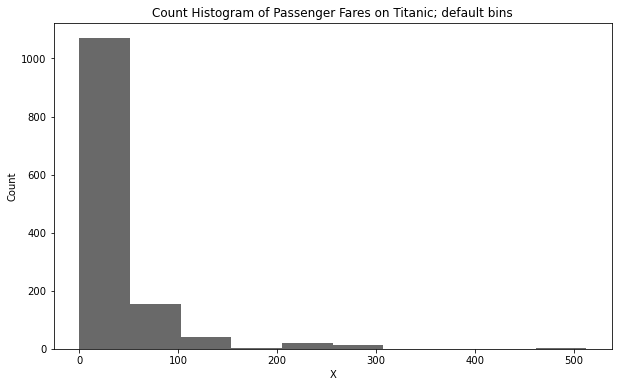

In [43]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist( titanic[ "fare"], color="DimGray")
axes.set_ylabel( "Count")
axes.set_xlabel( "X")
axes.set_title("Count Histogram of Passenger Fares on Titanic; default bins")

plt.show()
plt.close()

We've only worked with discrete probability distributions so we need to discretize this variable like we did for `age`.
However, there are many more possible values here.
Additionally, most of the values are below 100 pounds.
Let's do a histogram of values below 100 pounds.

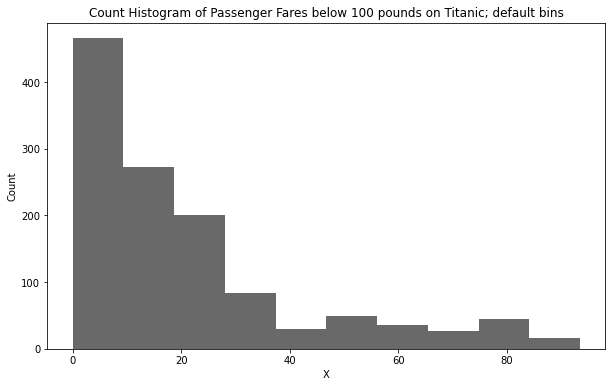

In [44]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist( titanic[titanic[ "fare"] < 100]["fare"], color="DimGray")
axes.set_ylabel( "Count")
axes.set_xlabel( "X")
axes.set_title("Count Histogram of Passenger Fares below 100 pounds on Titanic; default bins")

plt.show()
plt.close()

So it's fair to say that most fares are really below 25 pounds.
Let's map the fare into 25 pound increments.

In [45]:
titanic["fare_group"] = titanic["fare"] // 25

In [46]:
fare_group_counts = pysqldf(f"SELECT fare_group, count(*) AS cnt, count(*)/{float(passengers)} AS pct FROM titanic WHERE fare_group IS NOT NULL GROUP BY fare_group ORDER BY fare_group")

In [47]:
pd.DataFrame(fare_group_counts)

,fare_group,cnt,pct
0,0.0,821,0.627196
1,1.0,245,0.187166
2,2.0,97,0.074102
3,3.0,61,0.046600
4,4.0,17,0.012987
5,5.0,16,0.012223
6,6.0,13,0.009931
7,8.0,13,0.009931
8,9.0,8,0.006112
9,10.0,13,0.009931


Let's see what our joint probability distribution looks like:

In [48]:
query = f"""
SELECT survived, fare_group, count(*) AS cnt, count(*)/{float(passengers)} AS pct 
FROM titanic 
WHERE fare_group IS NOT NULL
GROUP BY survived, fare_group
ORDER BY survived, fare_group
"""
survived_and_fare_group_counts = pysqldf(query)

In [49]:
pd.DataFrame(survived_and_fare_group_counts)

,survived,fare_group,cnt,pct
0,0,0.0,583,0.445378
1,0,1.0,141,0.107716
2,0,2.0,44,0.033613
3,0,3.0,16,0.012223
4,0,4.0,4,0.003056
5,0,5.0,3,0.002292
6,0,6.0,5,0.003820
7,0,8.0,6,0.004584
8,0,9.0,3,0.002292
9,0,10.0,3,0.002292


It's good except that our code for handling the normalization doesn't handle missing values.
Looking at the values, we could just cap our ranges at 10 (10$\times$25 = 250 pounds) and it won't distort the results.

<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Note</strong>
    <p>The purpose of this assignment is to get familiar with conditional probability as it relates to data...not solve all the problems. The most important thing is to <strong>explain what you're doing, why, and the implications</strong>. We're not looking for the right answer or right model (well, unless it is really just arithmetic), we're looking for the right process and for your thinking.</p>
</div>


Let's cap off the top fare group and recalculate everything:

In [50]:
titanic["fare_group"] = titanic["fare_group"].apply(lambda x: x if x < 20.0 else 10.0)

In [52]:
fare_group_counts = pysqldf(f"SELECT fare_group, count(*) AS cnt, count(*)/{float(passengers)} AS pct FROM titanic WHERE fare_group IS NOT NULL GROUP BY fare_group ORDER BY fare_group")

In [53]:
pd.DataFrame(fare_group_counts)

,fare_group,cnt,pct
0,0.0,821,0.627196
1,1.0,245,0.187166
2,2.0,97,0.074102
3,3.0,61,0.046600
4,4.0,17,0.012987
5,5.0,16,0.012223
6,6.0,13,0.009931
7,8.0,13,0.009931
8,9.0,8,0.006112
9,10.0,18,0.013751


In [54]:
query = f"""
SELECT survived, fare_group, count(*) AS cnt, count(*)/{float(passengers)} AS pct 
FROM titanic 
WHERE fare_group IS NOT NULL
GROUP BY survived, fare_group
ORDER BY survived, fare_group
"""
survived_and_fare_group_counts = pysqldf(query)

In [55]:
pd.DataFrame(survived_and_fare_group_counts)

,survived,fare_group,cnt,pct
0,0,0.0,583,0.445378
1,0,1.0,141,0.107716
2,0,2.0,44,0.033613
3,0,3.0,16,0.012223
4,0,4.0,4,0.003056
5,0,5.0,3,0.002292
6,0,6.0,5,0.003820
7,0,8.0,6,0.004584
8,0,9.0,3,0.002292
9,0,10.0,4,0.003056


We are now in a position to calculate our conditional probability $P(survived|fare)$:

In [58]:
normalizer = lambda row: normalize_by_feature("fare_group", {k:i for i, k in enumerate([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0, 9.0, 10.0])}, fare_group_counts, row)
survived_and_fare_group_counts["pct_by_fare_group"] = survived_and_fare_group_counts.apply(normalizer, axis=1, result_type='reduce')

In [59]:
pd.DataFrame(survived_and_fare_group_counts)

,survived,fare_group,cnt,pct,pct_by_fare_group
0,0,0.0,583,0.445378,0.710110
1,0,1.0,141,0.107716,0.575510
2,0,2.0,44,0.033613,0.453608
3,0,3.0,16,0.012223,0.262295
4,0,4.0,4,0.003056,0.235294
5,0,5.0,3,0.002292,0.187500
6,0,6.0,5,0.003820,0.384615
7,0,8.0,6,0.004584,0.461538
8,0,9.0,3,0.002292,0.375000
9,0,10.0,4,0.003056,0.222222


We could probably tweak the ranges quite a bit more as the data is pretty sparse once you get above 75 pounds but the results seem to match our hypothesis that the more you paid for your ticket, the more likely were to survive.
Of course, we'd need to look at all the features to see how they interact.
For example, if a couple purchased a 150 pound ticket, is the survivor the wife and the non-survivor the husband?

## Naive Bayes Classifier

In [51]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import OrdinalEncoder

1. Calculate the Naive Bayes Classifier for $P(survived|pclass, sex, decade, parch, sibsp)$ and make 5 predictions.

(Remember...discuss/code/discuss. This is especially true for the predictions...when you make up each passenger, do you expect them to survive or perish?)

We can follow the same basic process we did in the Titanic Case Study but we'll just be building a larger model.
We've already seen most of the variables, however we need to have a look at `sibsp`:

In [60]:
sibsp_counts = pysqldf(f"SELECT sibsp, count(*) AS cnt, count(*)/{float(passengers)} AS pct FROM titanic GROUP BY sibsp ORDER BY sibsp")

In [61]:
sibsp_counts

,sibsp,cnt,pct
0,0,891,0.680672
1,1,319,0.243697
2,2,42,0.032086
3,3,20,0.015279
4,4,22,0.016807
5,5,6,0.004584
6,8,9,0.006875


As with `parch`, we might do better for now to convert this into a boolean variable:

In [62]:
titanic["sibsp_count"] = titanic["sibsp"]
titanic["sibsp"] = titanic["sibsp_count"] > 0
titanic["sibsp"] = titanic["sibsp"].astype(int)

<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Note</strong>
    <p>Be careful with destructive, non-idempotent changes to your data frames.</p>
</div>


We also need to calculate `decade`:

In [63]:
titanic["decade"] = (titanic["age"] // 10) * 10

We're going to create an OrdinalEncoder, filter out passengers without age information, and then apply it to the variables:

In [64]:
encoder = OrdinalEncoder()

In [65]:
with_age = titanic[titanic["age"].notnull()]

In [72]:
encoder.fit(with_age[["pclass", "sex", "decade", "parch", "sibsp"]])

OrdinalEncoder()

Note that we had to fit the ordinal encoder to all our data, even variables that are numeric, because we're using the Categorical Naive Bayes (and the variables are mostly categorical anyway, even if some of them are numbers).

In [73]:
encoder.categories_

[array([1, 2, 3]),
 array(['female', 'male'], dtype=object),
 array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 array([0, 1]),
 array([0, 1])]

Now we can fit our Naive Bayes Classifier using `pclass`, `sex`, `decade`, `parch`, `sibsp`:

In [69]:
clf = CategoricalNB()

In [74]:
clf.fit(encoder.transform(with_age[["pclass", "sex", "decade", "parch", "sibsp"]]), with_age["survived"])

CategoricalNB()

We can now predict the outcome for 5 passengers onboard Titanic.

First, we have a 20-something first class, female passenger with no parents or siblings. The hypothesis is that she would survive:

In [76]:
clf.predict_proba(encoder.transform([(1, 'female', 20, 0, 0)]))

array([[0.18640382, 0.81359618]])

Yes.

Now we have a 40-something second class, male passenger, with children and a spouse. We predict he did not survive:

In [77]:
clf.predict_proba(encoder.transform([(2, 'male', 40, 1, 1)]))

array([[0.60085012, 0.39914988]])

We were, sadly, correct.

What about his wife, I think she would have survived. (#3)

In [78]:
clf.predict_proba(encoder.transform([(2, 'female', 40, 1, 1)]))

array([[0.11452918, 0.88547082]])

The model predicts she survived.

Let's look at someone from 3rd class. A man in his 40s with wife and children, I doubt he'd survive...

In [79]:
clf.predict_proba(encoder.transform([(3, 'male', 40, 1, 1)]))

array([[0.76951351, 0.23048649]])

Unfortunately, he was even less likely to survive. What about *his* wife, she might have survived?

In [80]:
clf.predict_proba(encoder.transform([(3, 'female', 30, 1, 1)]))

array([[0.19795863, 0.80204137]])

She most likely survived.

<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Note</strong>
    <p>There were any number of ways you could have done this. It might have been more interesting to pick specific passengers, predict their survival and see if they actually survived (remembering that it is probabilistic).</p>
    <p>We'll talk a lot more about modeling in the future, especially the use of training and test sets</p>
    <p>If this took you a while, you're not alone. Data is hard and time consuming. Sorry.</p>
</div>
